In [2]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host='', database='', user='', password='')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
data = pd.read_sql(query, db_connection)

In [3]:
for i in range(0, len(data)):
    data.iloc[i]['Timestamp'] = dt.datetime.strptime(data.iloc[i]['Timestamp'],' %d/%m/%Y %I:%M:%S %p')
    data.iloc[i]['Timestamp'] = data.iloc[i]['Timestamp'].strftime('%Y-%m-%d %H:%M:%S')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort('Timestamp')

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [4]:
attack_data = data[data['EVENT'] == 'Attack']

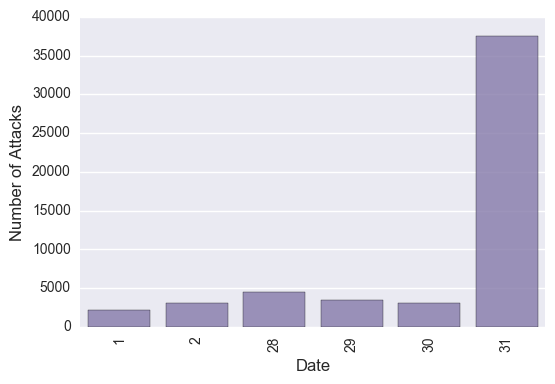

In [9]:
# Number of attacks by day
import seaborn as sns
color = sns.color_palette()
hours = attack_data['Timestamp'].dt.day
cnt_srs = hours.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.show()

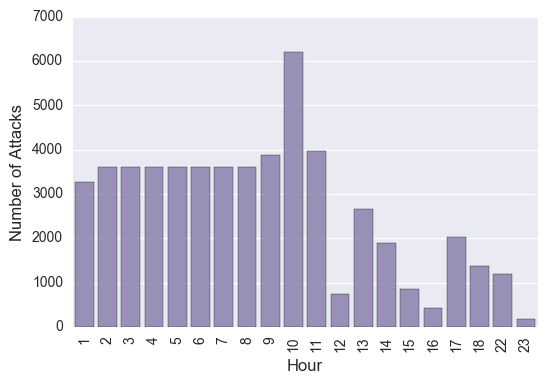

In [11]:
# Number of attacks by hour
hours = attack_data['Timestamp'].dt.hour
cnt_srs = hours.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.show()